<a href="https://colab.research.google.com/github/GDS-Education-Community-of-Practice/DSECOP/blob/Richard/Intro_to_Error_Reduct_Tech/into_to_error_reduct_tech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Error Reduction Techniques

Author: Richard Harry

Date Created: September 20th, 2023

Last Modified: November 30th, 2023



This is the first of a two-module notebook consisting of an introduction to sampling, interpreting, and optimizing machine learning models using mean absolute percent error (MAPE) and mean standard error (MSE). This module can be used as a corresponding resource for DSECOP 150: Introduction to Classification Algorithms

## Mean Absolute Percent Error

Forecasting is a common tool used by many sectors to project future events like demand and possible sales. The mean absolute percentage error, or MAPE, can be used to gauge how accurate a forecast is. By using this statistic, organizations may optimize resource allocation and budgetary decisions while also increasing the accuracy of their forecasts.

The accuracy of a forecasting approach is determined by a statistic called mean absolute percentage error, or MAPE. In order to determine how accurate the predicted quantities were in relation to the actual numbers, it represents the average of the absolute percentage errors of each entry in a dataset. MAPE necessitates the usage of dataset values other than zero and is frequently useful for large-scale data analysis.

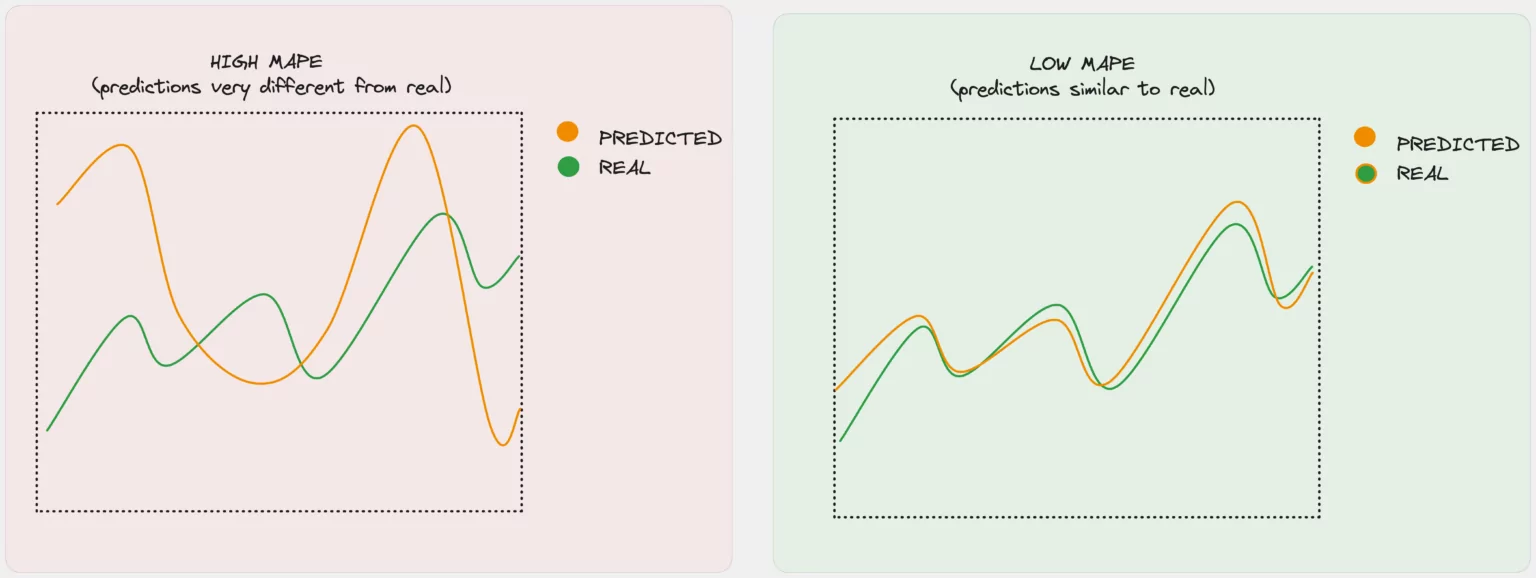

**Image**: High vs. Low MAPE prediction models, and their comparison to real time data forecasting.

Percentage errors are calculated in terms of absolute errors, without regards to sign. This avoids the problem of positive and negative errors canceling each other out.

$$MAPE = \frac{1}{n}∑⃒\frac{A_t-F_t}{A_t}\vert $$

Where:

$n$ is the number of fitted points,

$A_t$ is the actual value,

$F_t$ is the forecasted value.

∑ is summation notation (the absolute value is summed for every forecasted point in time).

##Mean Squared Error

Mean squared error (MSE) measures the amount of error in statistical models. It assesses the average squared difference between the observed and predicted values. When a model has no error, the MSE equals zero. As model error increases, its value increases. The mean squared error is also known as the mean squared deviation (MSD).

$$MSE = \frac {∑(y_i - \hat{y_i})^2}{n}$$

Where:

$y_i$ is the ith observed value,
$\hat{y_i}$ is the corresponding predicted value, and
$n$ is the number of observations.

Mean square error is calculated by taking the average, specifically the mean, of errors squared from data as it relates to a function. It is formally applied to regression functions, as a risk function corresponding to the expected value of the squared error loss.

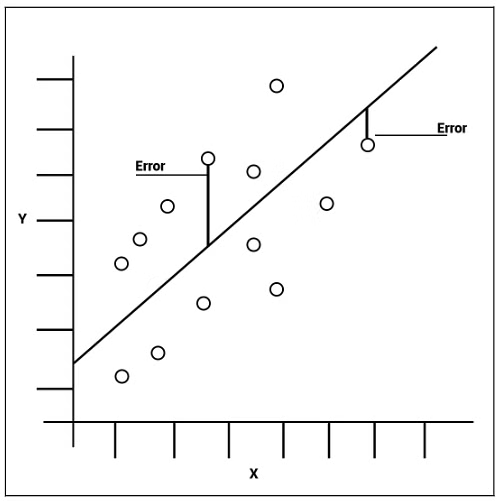



**Figure**: Regression trendline with error points denoted with respect to the data set line fitting. Source: https://www.simplilearn.com/tutorials/statistics-tutorial/mean-squared-error

#Dataset of Refractive Materials


Refractive Index (Index of Refraction) is a value calculated from the ratio of the speed of light in a vacuum to that in a second medium of greater density. The refractive index variable is most commonly symbolized by the letter n or n' in descriptive text and mathematical equations.

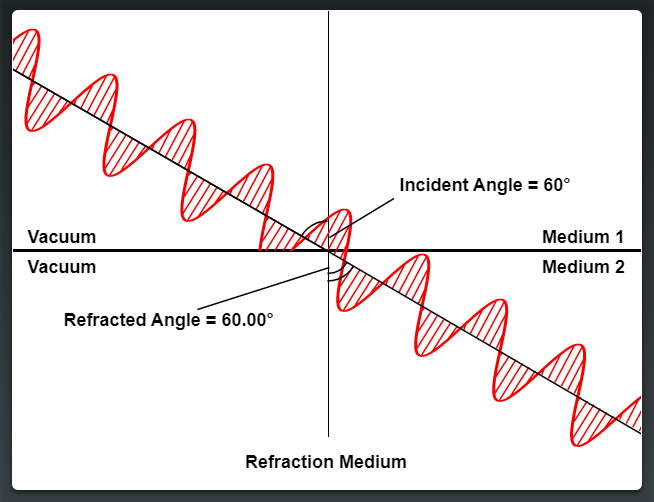

The formula of the refractive index is as follows:

$$ n = c/v$$

Where,

* n is the refractive index,

* c is the velocity of light in a vacuum ( 3 × 10^8 m/s),

* v is the velocity of light in a substance

The vacuum has a refractive index of 1. The refractive index of other materials can be calculated from the above equation. Higher the refractive index, the higher the optical density and slower is the speed of light. The table below lists the refractive index of different media.

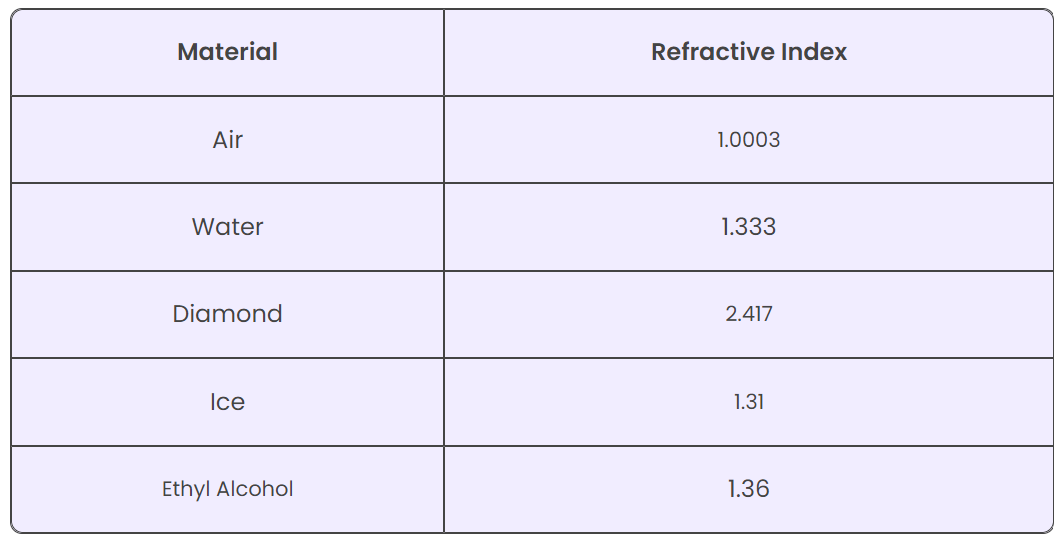

The data that we will be using in this module contains the extracted refractive index and corresponding wavelength for different glass types. Each glass type has a specific application that corresponds to a number on a scale from 1 to 7.

#Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
sns.set(style="white")
sns.set(style="whitegrid", color_codes = True)
import io
from google.colab import files


In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Exercise 0:

In [ ]:
df = pd.read_csv(io.StringIO(uploaded['glassdata.csv'].decode('utf-8')))
df = df[['ID', 'refractive_index','Na', 'Mg', 'Al', 'Si','K','Ca','Ba','Fe','glass_type']]

df.head()

,ID,refractive_index,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Note: Element variables are unit measurements for weight percent in corresponding oxide

In [ ]:
glassdata = pd.read_csv("glassdata.csv")

In [ ]:
glassdata.head

<bound method NDFrame.head of       ID  refractive_index     Na    Mg    Al     Si     K    Ca    Ba   Fe  \
0      1           1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0   
1      2           1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0   
2      3           1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0   
3      4           1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0   
4      5           1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0   
..   ...               ...    ...   ...   ...    ...   ...   ...   ...  ...   
209  210           1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0   
210  211           1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0   
211  212           1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0   
212  213           1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0   
213  214           1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0   

     glass_type  
0  

Exercise 1:

In [ ]:
feature_cols = ['Na', 'Mg', 'Al', 'Si','K','Ca','Ba','Fe']
X = glassdata[feature_cols] # Features
y = glassdata.refractive_index

Types of Glass: Class Attributes

1 - Buiding Windows, float processed

2 - Building Windows, non float processed

3 - Vehicle Windows, float processed

4 - Vehicle Windows, non float processed

5 - Containers

6 - Tableware

7 - Headlamps

Exercise 2:

<Axes: xlabel='glass_type', ylabel='refractive_index'>

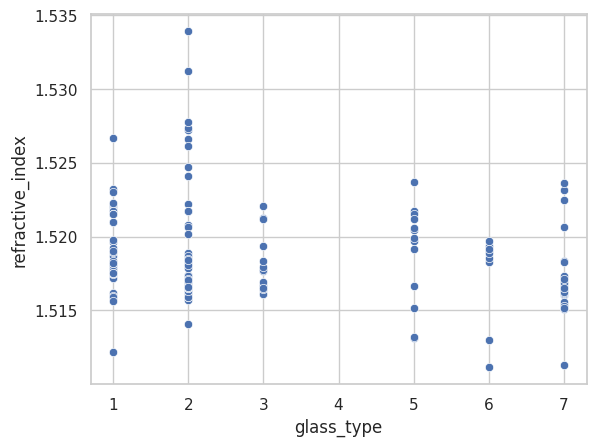

In [ ]:
sns.scatterplot(x='glass_type',
                y='refractive_index', data=df)

Exercise 3:

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
predictions = model.predict(X_test)

Exercise 4:

In [ ]:
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  1.5455114085165156e-06
mean_absolute_error :  0.0007630969396139156


Exercise 5:

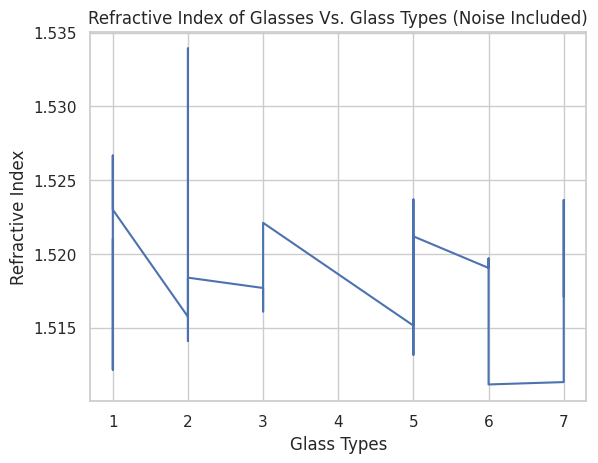

In [ ]:
plt.plot(glassdata.glass_type,y)
plt.title('Refractive Index of Glasses Vs. Glass Types (Noise Included)')
plt.xlabel('Glass Types')
plt.ylabel('Refractive Index')
plt.show()

Exercise 6:

Exercise 7:

ValueError: ignored

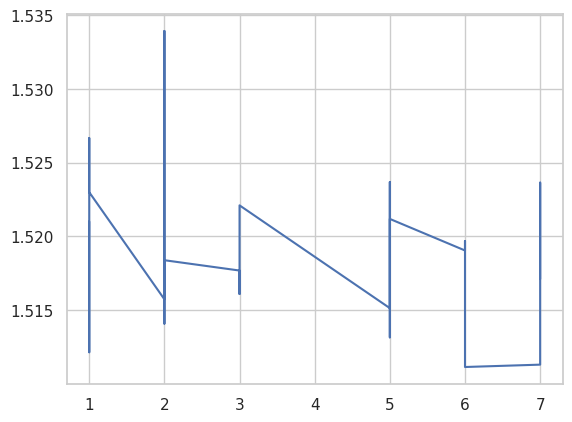

In [ ]:
plt.plot(glassdata.glass_type,y)
plt.plot(glassdata.glass_type, y_test)
plt.title('Refractive Index of Glasses Vs. Glass Types (Noise and Prediction)')
plt.xlabel('Glass Type')
plt.ylabel('Refractive Index')
plt.legend(['y','y_train'])
plt.show()